IMPORTING NECCESARY PACKAGES

In [596]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

READING TRAIN AND TEST DATA

In [597]:
df = pd.read_excel('/content/Train.xlsx')
df_test = pd.read_excel('/content/Test.xlsx')
test_c = df_test.copy()

DESCRIPTIVE STATISTICS

In [598]:
df.head()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
0,PR11101,1,NY,BATHGATE,1473 CROTONA PLACE,10456,2927,127,02 TWO FAMILY DWELLINGS,2,0,2,1900,2394,1990,1,B1,2014-05-30,540000
1,PR11102,1,NY,BATHGATE,453 EAST 181,10457,3037,110,03 THREE FAMILY DWELLINGS,3,0,3,1687,3037,2002,1,C0,2014-09-13,750000
2,PR11103,1,NY,BATHGATE,511 EAST 171 STREET,10457,2912,155,02 TWO FAMILY DWELLINGS,2,0,2,2000,2400,1989,1,B1,2014-09-28,470000
3,PR11104,1,NY,BATHGATE,547 CLAREMONT PARKWAY,10457,2929,134,02 TWO FAMILY DWELLINGS,2,0,2,2356,2394,1991,1,B1,2014-06-05,570000
4,PR11105,1,NY,BATHGATE,2063 WASHINGTON AVENUE,10457,3036,140,02 TWO FAMILY DWELLINGS,2,0,2,3346,2308,1993,1,B1,2015-02-07,640000


In [599]:
df_test.head()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation
0,PR51101,1,NY,BATHGATE,3860 3 AVENUE,10457,2929,117,02 TWO FAMILY HOMES,2,0,2,2498,2394,1995,1,B1,2013-06-24
1,PR51102,1,NY,BATHGATE,455 E. 179TH STREET,10457,3036,65,02 TWO FAMILY DWELLINGS,2,0,2,2033,2340,1994,1,B1,2014-08-28
2,PR51103,1,NY,BATHGATE,4415 3 AVENUE,10457,3048,51,14 RENTALS - 4-10 UNIT,4,1,5,2500,6000,1963,2,S4,2015-01-31
3,PR51104,1,NY,BATHGATE,407 EAST 174 STREET,10457,2899,34,30 WAREHOUSES,0,1,1,3439,3320,1951,4,E1,2015-03-12
4,PR51105,1,NY,EAST TREMONT,2175 CROTONA AVENUE,10457,3083,40,03 THREE FAMILY DWELLINGS,3,0,3,1348,2931,1997,1,C0,2014-06-07


In [600]:
df.shape,df_test.shape

((16810, 19), (2936, 18))

In [601]:
df.tail()

,PropertyID,Borough,State,Surroundings,Address,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue
16805,PR27906,4,NY,CIVIC CENTER,30 PARK PLACE,10007,123,1213,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,29715,2803,2004,2,R4,2014-11-30,8454562
16806,PR27907,4,NY,CIVIC CENTER,56 LEONARD STREET,10013,176,1054,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,12518,2252,2003,2,R4,2014-12-19,6250000
16807,PR27908,4,NY,CIVIC CENTER,56 LEONARD STREET,10013,176,1102,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,12518,2177,2003,2,R4,2014-11-16,7150000
16808,PR27909,4,NY,TRIBECA,250 SOUTH END AVENUE,10280,16,2249,13 CONDOS - ELEVATOR APARTMENTS,1,0,1,12644,594,1981,2,R4,2014-09-17,550000
16809,PR27910,4,NY,HARLEM-UPPER,415 WEST 150 STREET,10031,2065,22,08 RENTALS - ELEVATOR APARTMENTS,16,1,17,4996,29529,2007,2,D7,2013-03-22,5000000


In [602]:
df.describe()

,Borough,ZipCode,Block,Lot,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,PropertyEvaluationvalue
count,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,16810.000000,1.681000e+04,1.681000e+04,16810.000000,16810.000000,1.681000e+04
mean,3.439143,10871.027543,5428.122308,266.327722,1.862225,0.137775,2.000000,1.092492e+04,3.612157e+03,1973.982867,1.289530,8.084101e+05
std,1.398950,522.996869,3710.031921,542.420132,8.027805,2.185857,8.472771,5.837620e+04,1.627378e+04,23.632595,0.713779,8.978317e+05
min,1.000000,10001.000000,6.000000,1.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000e+00,1941.000000,1.000000,1.000440e+05
25%,2.000000,10312.000000,2401.250000,25.000000,1.000000,0.000000,1.000000,2.100000e+03,1.224000e+03,1951.000000,1.000000,4.250000e+05
50%,3.000000,11207.000000,5050.000000,52.000000,1.000000,0.000000,1.000000,3.200000e+03,1.750000e+03,1968.000000,1.000000,5.900000e+05
75%,5.000000,11364.000000,7376.750000,138.000000,2.000000,0.000000,2.000000,5.000000e+03,2.449750e+03,1998.000000,1.000000,8.450000e+05
max,5.000000,11694.000000,16314.000000,5323.000000,437.000000,252.000000,437.000000,5.612000e+06,1.172005e+06,2012.000000,4.000000,9.935000e+06


In [603]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16810 entries, 0 to 16809
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   PropertyID                  16810 non-null  object        
 1   Borough                     16810 non-null  int64         
 2   State                       16810 non-null  object        
 3   Surroundings                16810 non-null  object        
 4   Address                     16810 non-null  object        
 5   ZipCode                     16810 non-null  int64         
 6   Block                       16810 non-null  int64         
 7   Lot                         16810 non-null  int64         
 8   BldgClassCategory           16810 non-null  object        
 9   NoOfResidentialUnits        16810 non-null  int64         
 10  NoOfCommercialUnits         16810 non-null  int64         
 11  TotalNoOfUnits              16810 non-null  int64     

EXPLORATORY DATA ANALYSIS

Finding duplicate values in data

In [604]:
print(f"Train data contains {df.duplicated().sum()} duplicated value")
print(f"Test data contains {df_test.duplicated().sum()} duplicated value")

Train data contains 0 duplicated value
Test data contains 0 duplicated value


In [605]:
df.drop_duplicates(keep='first', inplace=True)

In [606]:
df.duplicated().sum()

0

In [607]:
df_test.duplicated().sum()

0

In [608]:
#We can see that we dont have any duplicate entry in the data.

Missing value handling

In [609]:
df.isnull().sum().sum()

0

In [610]:
df_test.isnull().sum().sum()

0

HANDLING CATEGORICAL DATA

In [611]:
print(df.State.unique())
print(df_test.State.unique())

['NY']
['NY']


In [612]:
#State Column has only one unique value ,so we can drop this variable.
df.drop(['State'],axis=1,inplace=True)
df_test.drop(['State'],axis=1,inplace=True)


In [613]:
print(df.Address.unique())
print(df_test.Address.unique())

['1473 CROTONA PLACE' '453 EAST 181' '511 EAST 171 STREET' ...
 '510 EAST 80TH STREET' '56 LEONARD ST' '415 WEST 150 STREET']
['3860 3 AVENUE' '455 E. 179TH STREET' '4415 3 AVENUE' ... '30 PARK PLACE'
 '77 READE STREET' '608 WEST 149 STREET']


In [614]:
#Since address is not required as we can use zipcode instead.
df.drop(['Address'],axis=1,inplace=True)
df_test.drop(['Address'],axis=1,inplace=True)

FEATURE ENGINEERING

In [615]:
#using YearOfConstruction and DateOfEvaluation we can derive a new features as follows:

In [616]:
from datetime import date
import datetime

In [617]:
# converting 'DateOfEvaluation' to datetime to extract the year
df['DateOfEvaluation'] = pd.to_datetime(df['DateOfEvaluation'])
df_test['DateOfEvaluation'] = pd.to_datetime(df_test['DateOfEvaluation'])

In [618]:
df['yearOfEval'] = df['DateOfEvaluation'].dt.year
df_test['yearOfEval'] = df_test['DateOfEvaluation'].dt.year

In [619]:
# Creating a new column 'age' of the property
df['age']= df['yearOfEval']-df['YearOfConstruction']
df_test['age']= df_test['yearOfEval']-df_test['YearOfConstruction']

In [620]:
df.head()

,PropertyID,Borough,Surroundings,ZipCode,Block,Lot,BldgClassCategory,NoOfResidentialUnits,NoOfCommercialUnits,TotalNoOfUnits,LandAreaInSqFt,GrossAreaInSqFt,YearOfConstruction,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,DateOfEvaluation,PropertyEvaluationvalue,yearOfEval,age
0,PR11101,1,BATHGATE,10456,2927,127,02 TWO FAMILY DWELLINGS,2,0,2,1900,2394,1990,1,B1,2014-05-30,540000,2014,24
1,PR11102,1,BATHGATE,10457,3037,110,03 THREE FAMILY DWELLINGS,3,0,3,1687,3037,2002,1,C0,2014-09-13,750000,2014,12
2,PR11103,1,BATHGATE,10457,2912,155,02 TWO FAMILY DWELLINGS,2,0,2,2000,2400,1989,1,B1,2014-09-28,470000,2014,25
3,PR11104,1,BATHGATE,10457,2929,134,02 TWO FAMILY DWELLINGS,2,0,2,2356,2394,1991,1,B1,2014-06-05,570000,2014,23
4,PR11105,1,BATHGATE,10457,3036,140,02 TWO FAMILY DWELLINGS,2,0,2,3346,2308,1993,1,B1,2015-02-07,640000,2015,22


In [621]:
# dropping 'DateOfEvaluation','YearOfConstruction','yearOfEval' since the age of the property has been calculated
# residential units and commercial units will be given different values, hence totalunits not required
# building class and category is already mentioned in 'TaxClass_AtEvaluationTime'
# newyork address is generally represented as borough,block,lot. since lots are too specific to the place it wouldnt make much difference 
df.drop(['DateOfEvaluation','YearOfConstruction','yearOfEval','TotalNoOfUnits','BldgClassCategory','Lot'],axis=1,inplace=True)
df_test.drop(['DateOfEvaluation','YearOfConstruction','yearOfEval','TotalNoOfUnits','BldgClassCategory','Lot'],axis=1,inplace=True)

In [622]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16810 entries, 0 to 16809
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   PropertyID                  16810 non-null  object
 1   Borough                     16810 non-null  int64 
 2   Surroundings                16810 non-null  object
 3   ZipCode                     16810 non-null  int64 
 4   Block                       16810 non-null  int64 
 5   NoOfResidentialUnits        16810 non-null  int64 
 6   NoOfCommercialUnits         16810 non-null  int64 
 7   LandAreaInSqFt              16810 non-null  int64 
 8   GrossAreaInSqFt             16810 non-null  int64 
 9   TaxClass_AtEvaluationTime   16810 non-null  int64 
 10  BldgClass_AtEvaluationTime  16810 non-null  object
 11  PropertyEvaluationvalue     16810 non-null  int64 
 12  age                         16810 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.8+ MB


In [623]:
df.shape,df_test.shape

((16810, 13), (2936, 12))

In [624]:
print((df == 0).sum())

PropertyID                        0
Borough                           0
Surroundings                      0
ZipCode                           0
Block                             0
NoOfResidentialUnits            802
NoOfCommercialUnits           15790
LandAreaInSqFt                    0
GrossAreaInSqFt                   0
TaxClass_AtEvaluationTime         0
BldgClass_AtEvaluationTime        0
PropertyEvaluationvalue           0
age                              79
dtype: int64


In [625]:
print((df_test == 0).sum())

PropertyID                       0
Borough                          0
Surroundings                     0
ZipCode                          0
Block                            0
NoOfResidentialUnits           155
NoOfCommercialUnits           2750
LandAreaInSqFt                   0
GrossAreaInSqFt                  0
TaxClass_AtEvaluationTime        0
BldgClass_AtEvaluationTime       0
age                             14
dtype: int64


In [626]:
# as there are 0 values in age and property assessment is usually done on buildings of atleast 1 year of age
df= df[df['age']!=0]
df_test= df_test[df_test['age']!=0]
df.shape,df_test.shape

((16731, 13), (2922, 12))

In [627]:
# taking the maximum of 2 as building area for calculating market value
(df['LandAreaInSqFt']>df['GrossAreaInSqFt']).sum()
df['bldg_area']=df[["LandAreaInSqFt", "GrossAreaInSqFt"]].max(axis=1)
df_test['bldg_area']=df_test[["LandAreaInSqFt", "GrossAreaInSqFt"]].max(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [628]:
df.drop(["LandAreaInSqFt", "GrossAreaInSqFt"],axis=1,inplace=True)
df_test.drop(["LandAreaInSqFt", "GrossAreaInSqFt"],axis=1,inplace=True)
print(df.shape)
print(df_test.shape)

(16731, 12)
(2922, 11)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


VISUALIZATIONS

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


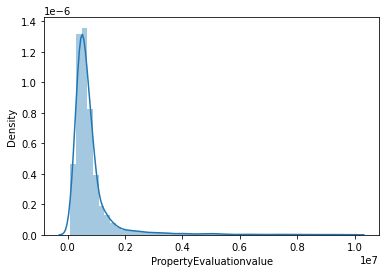

In [629]:
#UNIVARIATE ANALYSIS
sns.distplot(df.PropertyEvaluationvalue)

OBSERVATION

Distrubution of the PropertyEvaluationvalue is seemed right_skewed

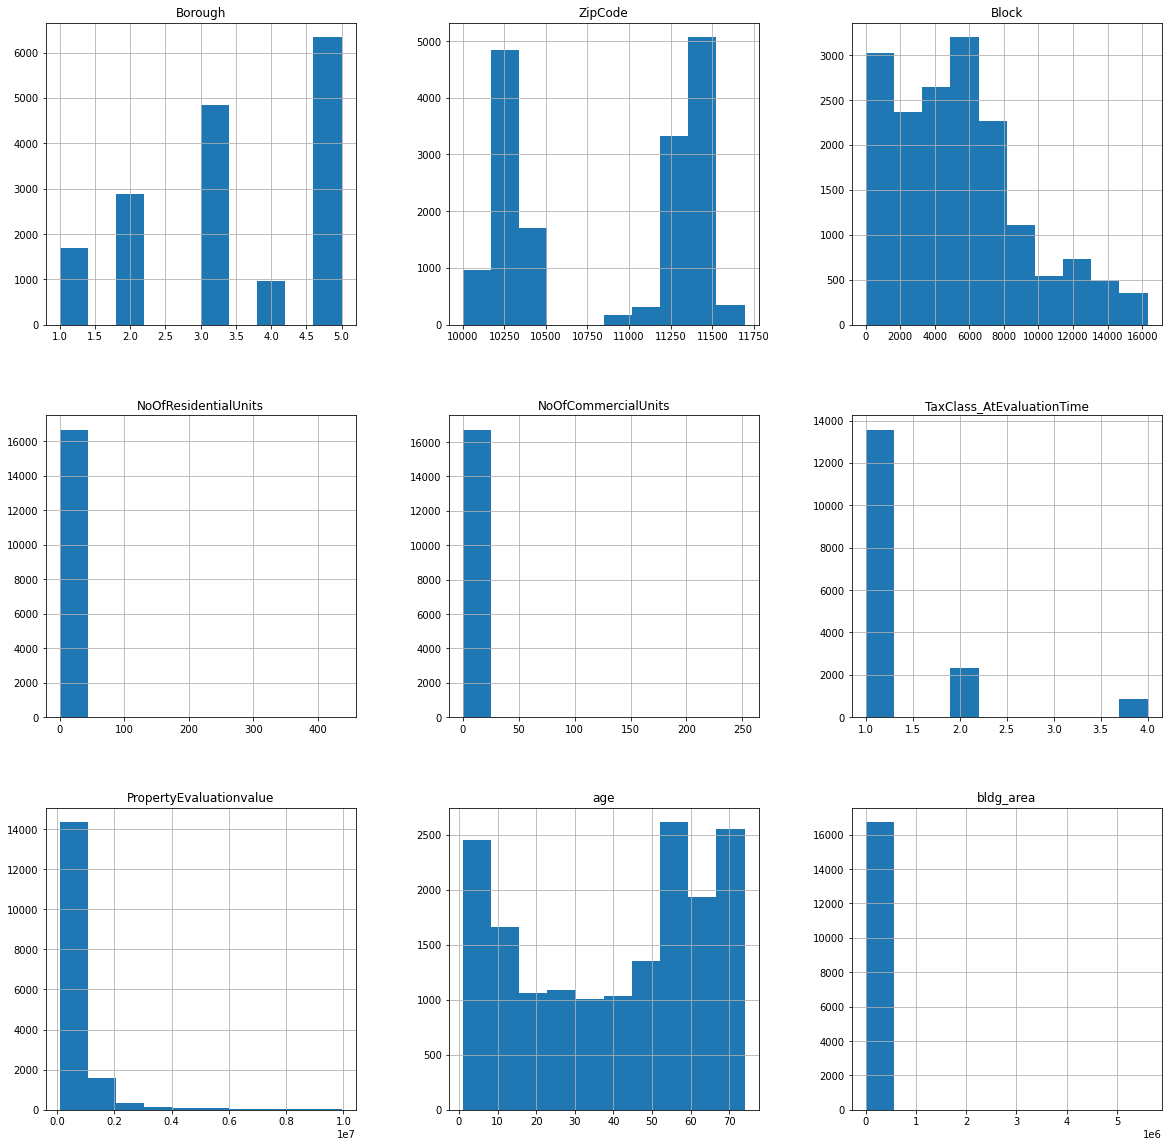

In [630]:
df.hist(figsize=(20,20))
plt.show()

SEPARTING NUMERICAL AND CATEGORICAL DATA

In [631]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['BldgClass_AtEvaluationTime']= label_encoder.fit_transform(df['BldgClass_AtEvaluationTime'])

df['BldgClass_AtEvaluationTime'].unique()


array([ 9, 13, 90,  5, 16, 40, 10, 54, 24, 20, 61,  2,  1,  8, 12, 78, 11,
        0, 87, 56,  3, 79, 27, 57, 92, 96,  6, 55, 19, 14, 76, 93, 36,  4,
       34, 32, 53, 26, 60, 88, 43, 15, 38, 83, 91, 77, 89, 44, 69, 70, 17,
       94, 45, 29, 65, 37, 41, 71, 23, 74, 28, 68, 72, 67, 21, 35, 42,  7,
       46, 64, 73, 66, 31, 97, 59, 75, 18, 58, 95, 47, 86, 99, 39, 51, 50,
       33, 85, 30, 22, 25, 48, 80, 98, 52, 82, 62, 63, 49, 81, 84])

In [632]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df_test['BldgClass_AtEvaluationTime']= label_encoder.fit_transform(df_test['BldgClass_AtEvaluationTime'])

df_test['BldgClass_AtEvaluationTime'].unique()


array([ 9, 58, 21, 13, 10,  5, 12,  2,  8, 56, 47, 15, 51, 11, 35,  0,  6,
        1,  3, 50, 37, 54, 14, 48, 55,  4, 40, 31, 18, 44, 36, 53, 60, 16,
       26, 45, 52, 38, 61, 57, 28, 63, 42, 27,  7, 22, 49, 62, 30, 32, 25,
       39, 43, 24, 23, 59, 19, 46, 41, 17, 29, 34, 33, 20])

In [633]:
#Since surrounds have more tahn 100 data values,hence we may drop the column
df.drop({'Surroundings'},axis=1,inplace=True)
df_test.drop({'Surroundings'},axis=1,inplace=True)

In [634]:
# type conversion to category
df['Borough'] = df['Borough'].astype('category')
df['ZipCode'] = df['ZipCode'].astype('category')
#df['BldgClass_AtEvaluationTime'] = df['BldgClass_AtEvaluationTime'].astype('category')

df_test['Borough'] = df_test['Borough'].astype('category')
df_test['ZipCode'] = df_test['ZipCode'].astype('category')
#df_test['BldgClass_AtEvaluationTime'] = df_test['BldgClass_AtEvaluationTime'].astype('category')

In [635]:
# dropping PropertyID from text and train
df.drop('PropertyID',axis=1,inplace=True)
df_test1= df_test.drop('PropertyID',axis=1)

In [636]:
# seperating numerical and categorical variables in train data
num_cols = df.select_dtypes(exclude='category').columns.tolist()
cat_cols = df.select_dtypes(include='category').columns.tolist() 

In [637]:
print("Num Columns ->", num_cols)
print("Cat Columns ->", cat_cols)

Num Columns -> ['Block', 'NoOfResidentialUnits', 'NoOfCommercialUnits', 'TaxClass_AtEvaluationTime', 'BldgClass_AtEvaluationTime', 'PropertyEvaluationvalue', 'age', 'bldg_area']
Cat Columns -> ['Borough', 'ZipCode']


In [638]:
# seperating numerical and categorical variables in test data
num_cols = df_test1.select_dtypes(exclude='category').columns.tolist()
cat_cols = df_test1.select_dtypes(include='category').columns.tolist() 

print("Num Columns ->", num_cols)
print("Cat Columns ->", cat_cols)

Num Columns -> ['Block', 'NoOfResidentialUnits', 'NoOfCommercialUnits', 'TaxClass_AtEvaluationTime', 'BldgClass_AtEvaluationTime', 'age', 'bldg_area']
Cat Columns -> ['Borough', 'ZipCode']


FEATURE SCALING

In [639]:
#x and y split
X=df.drop(['PropertyEvaluationvalue'],axis=1)
y=df['PropertyEvaluationvalue']

In [640]:
X.shape,y.shape

((16731, 9), (16731,))

In [641]:
# dummifying
X_dumm = pd.get_dummies(X,drop_first=True)
X_dumm.head()

,Block,NoOfResidentialUnits,NoOfCommercialUnits,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,age,bldg_area,Borough_2,Borough_3,Borough_4,...,ZipCode_11430,ZipCode_11432,ZipCode_11433,ZipCode_11434,ZipCode_11435,ZipCode_11436,ZipCode_11691,ZipCode_11692,ZipCode_11693,ZipCode_11694
0,2927,2,0,1,9,24,2394,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3037,3,0,1,13,12,3037,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2912,2,0,1,9,25,2400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2929,2,0,1,9,23,2394,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3036,2,0,1,9,22,3346,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [642]:
testdata1 = pd.get_dummies(df_test1,drop_first=True)
testdata1.head()

,Block,NoOfResidentialUnits,NoOfCommercialUnits,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,age,bldg_area,Borough_2,Borough_3,Borough_4,...,ZipCode_11429,ZipCode_11432,ZipCode_11433,ZipCode_11434,ZipCode_11435,ZipCode_11436,ZipCode_11691,ZipCode_11692,ZipCode_11693,ZipCode_11694
0,2929,2,0,1,9,18,2498,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3036,2,0,1,9,20,2340,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3048,4,1,2,58,52,6000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2899,0,1,4,21,64,3439,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3083,3,0,1,13,17,2931,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [643]:
# aligning train and test data for equal no. of columns
X_train, testdata1 = X_dumm.align(testdata1, join='outer', axis=1, fill_value=0)
print(X_train.shape)
print(testdata1.shape)

(16731, 184)
(2922, 184)


In [644]:
# Split the data into X_train, X_valid, y_train, y_valid with test_size = 0.20 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.20,random_state=615)

In [645]:
#Standardising
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])

X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [646]:
## Print the shape of X_train, X_valid, y_train, y_valid
print(" X_train :" , X_train.shape)
print(" X_valid :" , X_test.shape)
print(" y_train :" , y_train.shape)
print(" y_valid :" , y_test.shape)

 X_train : (13384, 184)
 X_valid : (3347, 184)
 y_train : (13384,)
 y_valid : (3347,)


In [647]:
X_train.shape,X_test.shape

((13384, 184), (3347, 184))

MAPE CALCULATION

In [648]:
from sklearn import metrics
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MODELLING

In [649]:
#Standardising
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])

X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [650]:
from sklearn import linear_model,metrics
#Linear Regression model
lm = linear_model.LinearRegression()
lm_model= lm.fit(X_train,y_train)

In [651]:
print('Intercept   :', lm_model.intercept_)
print('\n','*'*100)
print('Shape of Coefficients: \n', lm_model.coef_.shape)
print('\n','*'*100)
print('Coefficients: \n', lm_model.coef_)

Intercept   : 3844621.572829498

 ****************************************************************************************************
Shape of Coefficients: 
 (184,)

 ****************************************************************************************************
Coefficients: 
 [-1.38267183e+05 -6.16801794e+04  5.23477976e+16  1.00966204e+17
 -3.81308554e+05 -3.25949199e+16 -4.56159507e+03  8.15539275e+04
  3.23667890e+05 -1.71158189e+06 -1.91498800e+06  1.52860914e+06
 -8.37836376e+05 -1.79658016e+06 -4.79856673e+05 -1.14394427e+05
  1.66215877e+06  6.17357377e+05 -2.28995745e+06 -2.29099968e+06
 -1.34450330e+06 -3.48012734e+06 -1.33188908e+06 -1.96088742e+06
  2.12138580e+05  2.22188112e+05 -2.27481067e+06 -2.22360350e+06
 -1.95117915e+06 -6.59228253e+05 -1.69005983e+06  1.00604816e+06
 -2.52722101e+06 -2.62316025e+06 -8.74167500e+05 -3.59211725e+06
 -2.66804625e+06 -2.66732862e+06 -2.75312000e+05 -2.70075981e+06
 -1.99684812e+06 -2.84633375e+05 -1.21031691e+06 -1.66271100e+06

In [652]:
pred_train= lm.predict(X_train)
pred_valid = lm.predict(X_test)

In [653]:
print(mean_absolute_percentage_error(y_train,pred_train))
print(mean_absolute_percentage_error(y_test,pred_valid))

57.728434580955536
63.23718822970977


In [654]:
from sklearn.ensemble import RandomForestRegressor
# Model initilization
rf = RandomForestRegressor(n_estimators=10, max_depth=10,random_state=1030)
# Model training
rf.fit(X_train,y_train)
# Model predictions
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

In [655]:
print(mean_absolute_percentage_error(y_train,rf_train_pred))
print(mean_absolute_percentage_error(y_test,rf_test_pred))

39.26997458975582
44.08715029631274


In [656]:
df_test.head()

,PropertyID,Borough,ZipCode,Block,NoOfResidentialUnits,NoOfCommercialUnits,TaxClass_AtEvaluationTime,BldgClass_AtEvaluationTime,age,bldg_area
0,PR51101,1,10457,2929,2,0,1,9,18,2498
1,PR51102,1,10457,3036,2,0,1,9,20,2340
2,PR51103,1,10457,3048,4,1,2,58,52,6000
3,PR51104,1,10457,2899,0,1,4,21,64,3439
4,PR51105,1,10457,3083,3,0,1,13,17,2931


In [657]:
pred = rf.predict(testdata1)

In [658]:
submission = pd.DataFrame(data = df_test['PropertyID'], columns = ['PropertyID'])
submission['PropertyEvaluationvalue'] = pred
submission.to_csv('submission.csv', header=True, index=False)